In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import FixedLocator, LogLocator, LogFormatter, LogFormatterMathtext, NullFormatter

# print(sorted({f.name for f in matplotlib.font_manager.fontManager.ttflist}))
plt.rcParams['font.family'] = 'Nimbus Roman'
mpl.rcParams["text.usetex"] = True

# Supercell calculation

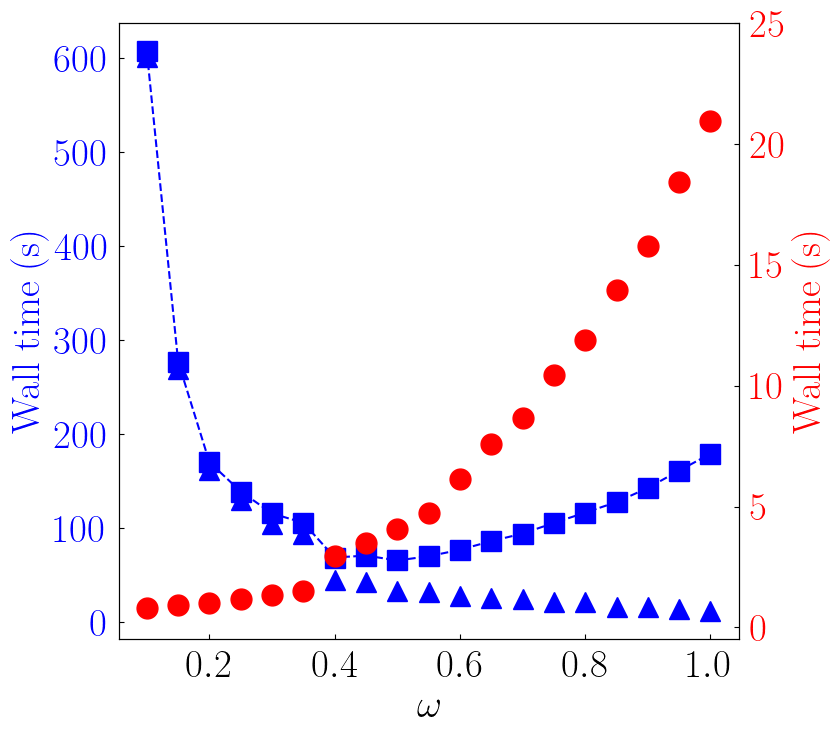

In [ ]:
# Load CSV
df = pd.read_csv("timing_supercell_omega_summary.csv")

# set fontsize
fs = 28
# set markersize
ms = 15

# Assume iteration
niter = 20

# Clean numeric columns (remove trailing dots and cast to float)
for c in df.columns:
    df[c] = pd.to_numeric(df[c].astype(str).str.rstrip("."), errors="coerce")

# Extract as NumPy arrays
omega = df["omega"].to_numpy()
time_2e2c = df["2e2c"].to_numpy()
time_2e3c_CC = df["2e3c(CC)"].to_numpy()
time_2e3c_CD = df["2e3c(CD)"].to_numpy()
niter = df["niter"].to_numpy()
total_rij = df["rij_bigmem"].to_numpy()

init_time = time_2e2c + time_2e3c_CC + time_2e3c_CD
iter_time = total_rij - init_time
per_iter = iter_time / niter

# RIJ per iteration
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

ax.plot(omega, init_time, marker = "^", markersize= ms, linestyle = "None", color = "blue")
ax.set_xlabel(r"$\omega$", fontsize = fs, fontname="Nimbus Roman")
ax.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.tick_params(axis='x', which='both', direction='in', labelsize=fs, pad = 8)

ax.set_ylabel("Wall time (s)", color='blue', fontsize = fs, fontname="Nimbus Roman")
ax.tick_params(axis='y', labelcolor='blue', which='both', direction='in', labelsize=fs, pad = 8)

ax2 = ax.twinx()
ax2.plot(omega, per_iter, marker = "o", markersize = ms, linestyle = "None", color = "red")
ax2.set_ylim(-0.5, 25)
ax2.set_ylabel("Wall time (s)", color='r', fontsize = fs, fontname="Nimbus Roman")
ax2.tick_params(axis='y', labelcolor='r', which='both', direction='in', labelsize=fs, pad = 8)


# Plot total time
# ax.plot(omega, init_time + per_iter * niter, marker = "s", markersize = ms, linestyle = "--", color = "blue")
ax.plot(omega, total_rij, marker = "s", markersize = ms, linestyle = "--", color = "blue")

plt.show()
